## Type - 1

In [1]:
from tensorflow.compat.v1 import ConfigProto
from tensorflow.compat.v1 import InteractiveSession

config = ConfigProto()
config.gpu_options.per_process_gpu_memory_fraction = 0.5
config.gpu_options.allow_growth = True
session = InteractiveSession(config=config)

In [2]:
# Convolutional Neural Network

# Importing the libraries
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [3]:
tf.__version__

'2.15.0'

In [4]:
# Preprocessing the Training set
train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

In [7]:
training_set = train_datagen.flow_from_directory(r"C:\Users\dubey\OneDrive\Desktop\trainging image for tyre",
                                                 target_size = (64, 64),
                                                 batch_size = 32,
                                                 class_mode = 'binary')

# Preprocessing the Test set
test_datagen = ImageDataGenerator(rescale = 1./255)
test_set = test_datagen.flow_from_directory(r"C:\Users\dubey\OneDrive\Desktop\testing image for tyre datasets",
                                            target_size = (64, 64),
                                            batch_size = 32,
                                            class_mode = 'binary')

Found 200 images belonging to 2 classes.
Found 200 images belonging to 2 classes.


In [8]:
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import Dense

In [9]:
from tensorflow.keras.regularizers import l2

In [10]:
# Initialising the CNN
cnn = tf.keras.models.Sequential()

# Step 1 - Convolution
cnn.add(tf.keras.layers.Conv2D(filters=32,padding="same",kernel_size=3, activation='relu', strides=2, input_shape=[64, 64, 3]))

# Step 2 - Pooling
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))

# Adding a second convolutional layer
cnn.add(tf.keras.layers.Conv2D(filters=32,padding='same',kernel_size=3, activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))

# Step 3 - Flattening
cnn.add(tf.keras.layers.Flatten())

# Step 4 - Full Connection
cnn.add(tf.keras.layers.Dense(units=128, activation='relu'))

# Step 5 - Output Layer
#cnn.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))
## For Binary Classification
cnn.add(Dense(1, kernel_regularizer=tf.keras.regularizers.l2(0.01),activation
             ='linear'))

In [11]:
cnn.add(Dense(4, kernel_regularizer=tf.keras.regularizers.l2(0.01),activation
             ='softmax'))
cnn.compile(optimizer = 'adam', loss = 'squared_hinge', metrics = ['accuracy'])

In [12]:
cnn.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 16, 16, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 16, 16, 32)        9248      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 8, 8, 32)          0         
 g2D)                                                            
                                                                 
 flatten (Flatten)           (None, 2048)              0         
                                                                 
 dense (Dense)               (None, 128)               2

In [13]:
# Compiling the CNN
cnn.compile(optimizer = 'adam', loss = 'hinge', metrics = ['accuracy'])

# Training the CNN on the Training set and evaluating it on the Test set
r=cnn.fit(x = training_set, validation_data = test_set, epochs = 15)

Epoch 1/15


7/7 [==============================] - 53s 7s/step - loss: 1.0350 - accuracy: 0.0000e+00 - val_loss: 1.0338 - val_accuracy: 0.0000e+00
Epoch 2/15
7/7 [==============================] - 41s 7s/step - loss: 1.0328 - accuracy: 0.0000e+00 - val_loss: 1.0318 - val_accuracy: 0.0000e+00
Epoch 3/15
7/7 [==============================] - 42s 6s/step - loss: 1.0309 - accuracy: 0.0000e+00 - val_loss: 1.0299 - val_accuracy: 0.0000e+00
Epoch 4/15
7/7 [==============================] - 42s 6s/step - loss: 1.0291 - accuracy: 0.0000e+00 - val_loss: 1.0281 - val_accuracy: 0.0000e+00
Epoch 5/15
7/7 [==============================] - 41s 6s/step - loss: 1.0275 - accuracy: 0.0000e+00 - val_loss: 1.0265 - val_accuracy: 0.0000e+00
Epoch 6/15
7/7 [==============================] - 42s 6s/step - loss: 1.0260 - accuracy: 0.0000e+00 - val_loss: 1.0250 - val_accuracy: 0.0000e+00
Epoch 7/15
7/7 [==============================] - 41s 6s/step - loss: 1.0244 - accuracy: 0.0000e+00 - val_loss: 1.0237 - v

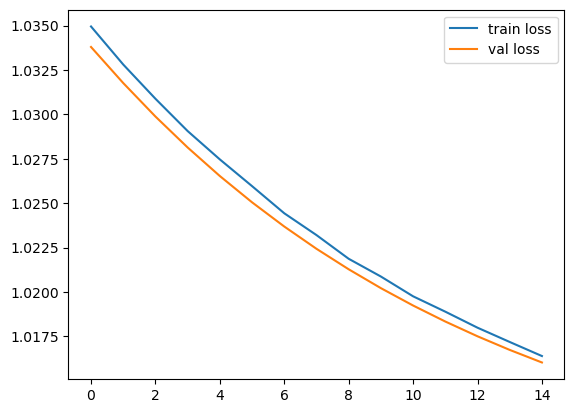

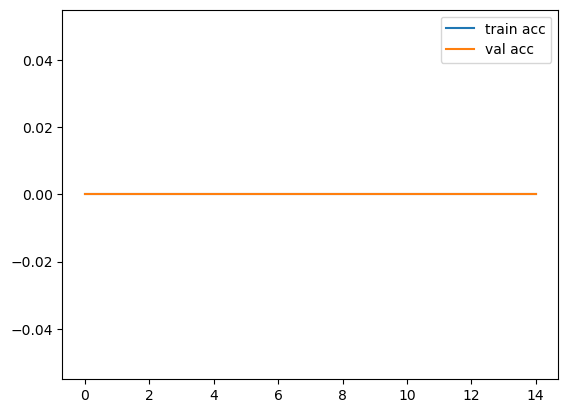

<Figure size 640x480 with 0 Axes>

In [14]:
# plot the loss
import matplotlib.pyplot as plt
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

# plot the accuracy
plt.plot(r.history['accuracy'], label='train acc')
plt.plot(r.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')

In [34]:
pip install h5py

Note: you may need to restart the kernel to use updated packages.


In [35]:
from tensorflow.keras.models import load_model

cnn.save('model_tyre_good.h5')

In [36]:
from tensorflow.keras.models import load_model
 
# load model
model = load_model('model_tyre_good.h5')

In [37]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 16, 16, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 16, 16, 32)        9248      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 8, 8, 32)          0         
 g2D)                                                            
                                                                 
 flatten (Flatten)           (None, 2048)              0         
                                                                 
 dense (Dense)               (None, 128)               2

In [43]:
import numpy as np
from tensorflow.keras.preprocessing import image
test_image = image.load_img(r"C:\Users\dubey\OneDrive\Desktop\test image\Defective (1).jpg", target_size = (64,64))
test_image = image.img_to_array(test_image)
test_image=test_image/255
test_image = np.expand_dims(test_image, axis = 0)
result = cnn.predict(test_image)

1/1 [==============================] - 0s 16ms/step


In [44]:
result

array([[0.23787864, 0.23292543, 0.25596827, 0.27322757]], dtype=float32)

In [45]:
import numpy as np
from tensorflow.keras.preprocessing import image
test_image = image.load_img(r"C:\Users\dubey\OneDrive\Desktop\test image\Defective (1).jpg", target_size = (64,64))
test_image = image.img_to_array(test_image)
test_image=test_image/255
test_image = np.expand_dims(test_image, axis = 0)
result = cnn.predict(test_image)

1/1 [==============================] - 0s 16ms/step


In [46]:
result

array([[0.23787864, 0.23292543, 0.25596827, 0.27322757]], dtype=float32)

In [48]:
if result[0].any() < 0:
    print("The image classified is not tyre_good")
else:
    print("The image classified is tyre_good")

The image classified is tyre_good


In [ ]:
from tensorflow.compat.v1 import ConfigProto
from tensorflow.compat.v1 import InteractiveSession

config = ConfigProto()
config.gpu_options.per_process_gpu_memory_fraction = 0.5
config.gpu_options.allow_growth = True
session = InteractiveSession(config=config)

# Convolutional Neural Network

# Importing the libraries
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import tensorflow as tf
import os

# Avoid OOM errors by setting GPU Memory Consumption Growth
gpus = tf.config.experimental.list_physical_devices('GPU')
for gpu in gpus: 
    tf.config.experimental.set_memory_growth(gpu, True)

tf.config.list_physical_devices('GPU')

import cv2
import imghdr

data_dir =r"C:\Users\dubey\OneDrive\Desktop\Dait (Summer Intership )\Tyre dataset" 

image_exts = ['jpeg','jpg', 'bmp', 'png']


for image_class in os.listdir(data_dir): 
    for image in os.listdir(os.path.join(data_dir, image_class)):
        image_path = os.path.join(data_dir, image_class, image)
        try: 
            img = cv2.imread(image_path)
            tip = imghdr.what(image_path)
            if tip not in image_exts: 
                print('Image not in ext list {}'.format(image_path))
                os.remove(image_path)
        except Exception as e: 
            print('Issue with image {}'.format(image_path))
            # os.remove(image_path)

import numpy as np
from matplotlib import pyplot as plt

data = tf.keras.utils.image_dataset_from_directory(r"C:\Users\dubey\OneDrive\Desktop\Dait (Summer Intership )\Tyre dataset" )
data_iterator = data.as_numpy_iterator()
batch = data_iterator.next()

fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for idx, img in enumerate(batch[0][:4]):
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(batch[1][idx])

data = data.map(lambda x,y: (x/255, y))

data.as_numpy_iterator().next()

train_size = int(len(data)*.7)
val_size = int(len(data)*.2)
test_size = int(len(data)*.1)



## TYPE - 2

## 1. Install Dependencies and Setup

In [1]:
import tensorflow as tf
import os

In [2]:
# Avoid OOM errors by setting GPU Memory Consumption Growth
gpus = tf.config.experimental.list_physical_devices('GPU')
for gpu in gpus: 
    tf.config.experimental.set_memory_growth(gpu, True)

In [3]:
tf.config.list_physical_devices('GPU')

[]

## 2. Remove dodgy images 

In [4]:
import cv2
import imghdr

C:\Users\dubey\AppData\Local\Temp\ipykernel_13024\4232469594.py:2: DeprecationWarning: 'imghdr' is deprecated and slated for removal in Python 3.13
  import imghdr


In [5]:
data_dir =r"C:\Users\dubey\OneDrive\Desktop\Dait (Summer Intership )\Tyre dataset" 

In [6]:
image_exts = ['jpeg','jpg', 'bmp', 'png']

In [7]:
for image_class in os.listdir(data_dir): 
    for image in os.listdir(os.path.join(data_dir, image_class)):
        image_path = os.path.join(data_dir, image_class, image)
        try: 
            img = cv2.imread(image_path)
            tip = imghdr.what(image_path)
            if tip not in image_exts: 
                print('Image not in ext list {}'.format(image_path))
                os.remove(image_path)
        except Exception as e: 
            print('Issue with image {}'.format(image_path))
            # os.remove(image_path)

## 3. Load Data 

In [8]:
import numpy as np
from matplotlib import pyplot as plt

In [9]:
data = tf.keras.utils.image_dataset_from_directory(r"C:\Users\dubey\OneDrive\Desktop\Dait (Summer Intership )\Tyre dataset" )

Found 1698 files belonging to 2 classes.


In [10]:
data_iterator = data.as_numpy_iterator()

In [11]:
batch = data_iterator.next()

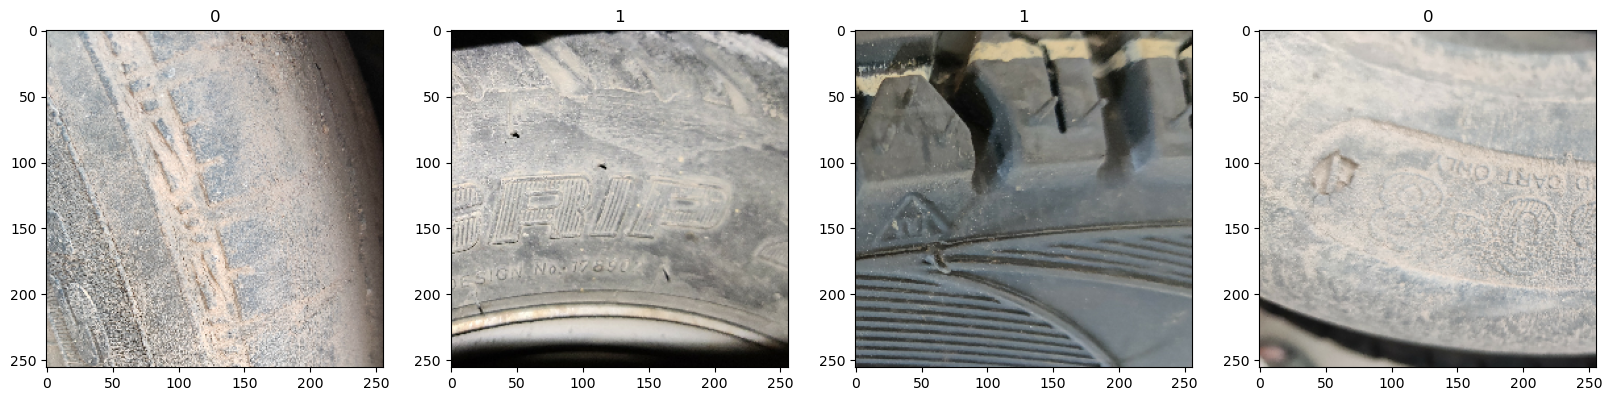

In [12]:
fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for idx, img in enumerate(batch[0][:4]):
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(batch[1][idx])

## 4. Scale Data 

In [13]:
data = data.map(lambda x,y: (x/255, y))

In [14]:
data.as_numpy_iterator().next()

(array([[[[0.02906542, 0.02906542, 0.02906542],
          [0.01703168, 0.01703168, 0.01703168],
          [0.01564104, 0.01564104, 0.01564104],
          ...,
          [0.42886174, 0.42886174, 0.4210186 ],
          [0.44771275, 0.45163432, 0.43202648],
          [0.41694647, 0.42086804, 0.4012602 ]],
 
         [[0.02043505, 0.02043505, 0.02043505],
          [0.02208946, 0.02208946, 0.02208946],
          [0.01734069, 0.01734069, 0.01734069],
          ...,
          [0.4448704 , 0.4448704 , 0.43702728],
          [0.43830445, 0.44222602, 0.42261818],
          [0.41733015, 0.4212517 , 0.40164387]],
 
         [[0.02357465, 0.01573151, 0.02749622],
          [0.02737223, 0.01952909, 0.0312938 ],
          [0.02417279, 0.02417279, 0.02417279],
          ...,
          [0.43878677, 0.4466299 , 0.4348652 ],
          [0.43460262, 0.43460262, 0.42675948],
          [0.42804912, 0.42804912, 0.42020598]],
 
         ...,
 
         [[0.54304534, 0.4999081 , 0.49206495],
          [0.54653

## 5. Split Data 

In [15]:
train_size = int(len(data)*.7)
val_size = int(len(data)*.2)
test_size = int(len(data)*.1)

In [16]:
train_size

37

In [17]:
train = data.take(train_size)
val = data.skip(train_size).take(val_size)
test = data.skip(train_size+val_size).take(test_size)

## 6. Build Deep Learning Model

In [18]:
train

<_TakeDataset element_spec=(TensorSpec(shape=(None, 256, 256, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

In [19]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout

In [20]:
model = Sequential()

In [21]:
model.add(Conv2D(16, (3,3), 1, activation='relu', input_shape=(256,256,3)))
model.add(MaxPooling2D())
model.add(Conv2D(32, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())
model.add(Conv2D(16, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [22]:
model.compile('adam', loss=tf.losses.BinaryCrossentropy(), metrics=['accuracy'])

In [23]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2  (None, 127, 127, 16)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 32)      4640      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 62, 62, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 60, 60, 16)        4624      
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 30, 30, 16)        0

## 7. Train 

In [24]:
logdir='logs'

In [25]:
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)

In [26]:
hist = model.fit(train, epochs=20, validation_data=val, callbacks=[tensorboard_callback])

Epoch 1/20


37/37 [==============================] - 105s 3s/step - loss: 0.6931 - accuracy: 0.6098 - val_loss: 0.5527 - val_accuracy: 0.7156
Epoch 2/20
37/37 [==============================] - 121s 3s/step - loss: 0.5692 - accuracy: 0.7306 - val_loss: 0.5128 - val_accuracy: 0.7969
Epoch 3/20
37/37 [==============================] - 143s 4s/step - loss: 0.5203 - accuracy: 0.7694 - val_loss: 0.4968 - val_accuracy: 0.8000
Epoch 4/20
37/37 [==============================] - 96s 3s/step - loss: 0.4667 - accuracy: 0.7939 - val_loss: 0.5324 - val_accuracy: 0.7250
Epoch 5/20
37/37 [==============================] - 26s 667ms/step - loss: 0.4088 - accuracy: 0.8260 - val_loss: 0.4728 - val_accuracy: 0.8000
Epoch 6/20
37/37 [==============================] - 25s 627ms/step - loss: 0.3582 - accuracy: 0.8488 - val_loss: 0.5085 - val_accuracy: 0.8156
Epoch 7/20
37/37 [==============================] - 25s 641ms/step - loss: 0.2886 - accuracy: 0.8843 - val_loss: 0.4177 - val_accuracy: 0.8250
Epoch 

## 8. Plot Performance

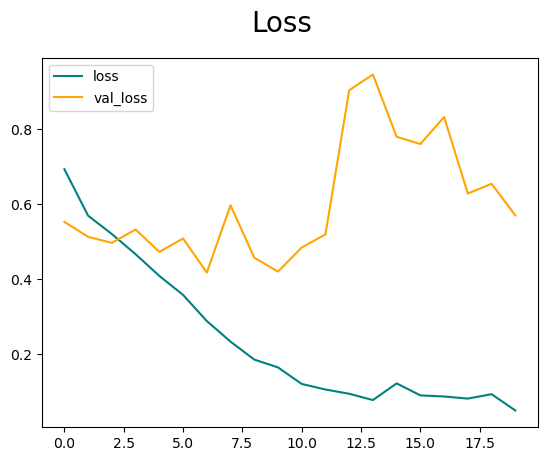

In [27]:
fig = plt.figure()
plt.plot(hist.history['loss'], color='teal', label='loss')
plt.plot(hist.history['val_loss'], color='orange', label='val_loss')
fig.suptitle('Loss', fontsize=20)
plt.legend(loc="upper left")
plt.show()

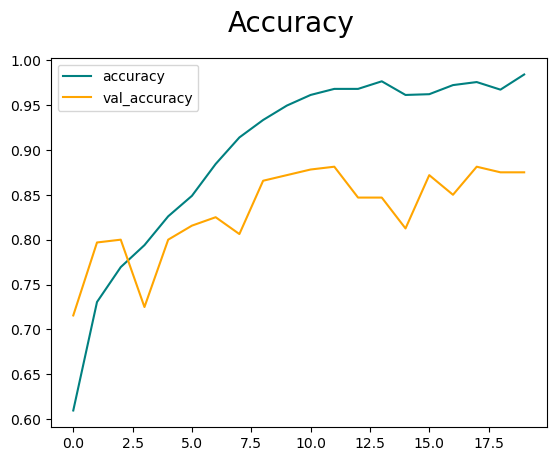

In [28]:
fig = plt.figure()
plt.plot(hist.history['accuracy'], color='teal', label='accuracy')
plt.plot(hist.history['val_accuracy'], color='orange', label='val_accuracy')
fig.suptitle('Accuracy', fontsize=20)
plt.legend(loc="upper left")
plt.show()

## 9.Evaluate

In [29]:
from tensorflow.keras.metrics import Precision, Recall, BinaryAccuracy

In [30]:
pre = Precision()
re = Recall()
acc = BinaryAccuracy()

In [31]:
for batch in test.as_numpy_iterator(): 
    X, y = batch
    yhat = model.predict(X)
    pre.update_state(y, yhat)
    re.update_state(y, yhat)
    acc.update_state(y, yhat)

1/1 [==============================] - 0s 125ms/step


In [32]:
print(pre.result(), re.result(), acc.result())

tf.Tensor(0.82894737, shape=(), dtype=float32) tf.Tensor(0.76829267, shape=(), dtype=float32) tf.Tensor(0.8, shape=(), dtype=float32)


## 10. Test 

In [33]:
import cv2

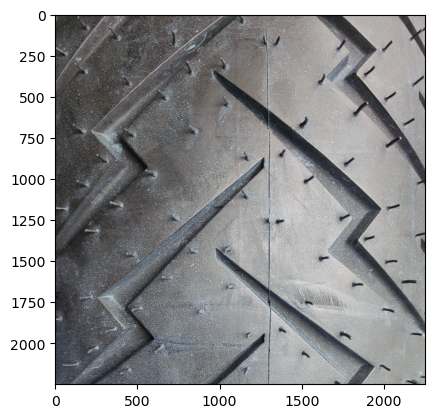

In [34]:
#img = cv2.imread(r"C:\Users\dubey\OneDrive\Desktop\Dait (Summer Intership )\Defective\Defective (1).jpg")
img = cv2.imread(r"C:\Users\dubey\OneDrive\Desktop\Dait (Summer Intership )\Good\good (1).jpg")
plt.imshow(img)
plt.show()

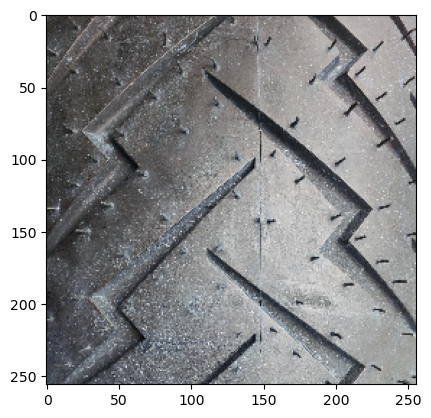

In [35]:
resize = tf.image.resize(img, (256,256))
plt.imshow(resize.numpy().astype(int))
plt.show()

In [36]:
yhat = model.predict(np.expand_dims(resize/255, 0))

1/1 [==============================] - 0s 143ms/step


In [37]:
yhat

array([[0.9999998]], dtype=float32)

In [38]:
if yhat > 0.5: 
    print(f'Predicted class is good tyre')
else:
    print(f'Predicted class is Defective tyre')

Predicted class is good tyre


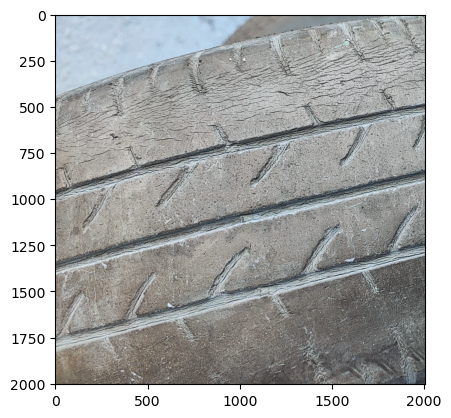

In [40]:
#img = cv2.imread(r"C:\Users\dubey\OneDrive\Desktop\Dait (Summer Intership )\Defective\Defective (1).jpg")
img = cv2.imread(r"C:\Users\dubey\OneDrive\Desktop\Dait (Summer Intership )\test image\Defective (1).jpg")
plt.imshow(img)
plt.show()

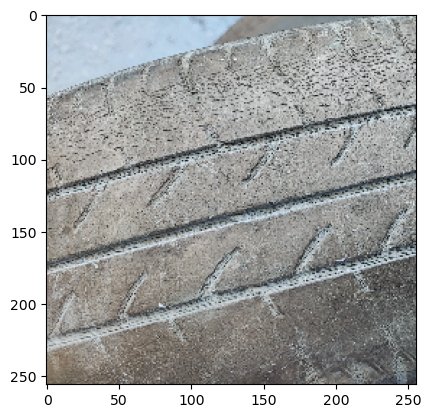

In [41]:
resize = tf.image.resize(img, (256,256))
plt.imshow(resize.numpy().astype(int))
plt.show()

In [42]:
yhat = model.predict(np.expand_dims(resize/255, 0))

1/1 [==============================] - 0s 16ms/step


In [43]:
yhat

array([[0.0003247]], dtype=float32)

In [44]:
if yhat > 0.5: 
    print(f'Predicted class is good tyre')
else:
    print(f'Predicted class is Defective tyre')

Predicted class is Defective tyre


In [1]:
import tensorflow as tf
import os
import cv2
import imghdr

data_dir =r"C:\Users\dubey\OneDrive\Desktop\Dait (Summer Intership )\Tyre dataset" 

image_exts = ['jpeg','jpg', 'bmp', 'png']

for image_class in os.listdir(data_dir): 
    for image in os.listdir(os.path.join(data_dir, image_class)):
        image_path = os.path.join(data_dir, image_class, image)
        try: 
            img = cv2.imread(image_path)
            tip = imghdr.what(image_path)
            if tip not in image_exts: 
                print('Image not in ext list {}'.format(image_path))
                os.remove(image_path)
        except Exception as e: 
            print('Issue with image {}'.format(image_path))
            # os.remove(image_path)

import numpy as np
from matplotlib import pyplot as plt

data = tf.keras.utils.image_dataset_from_directory(r"C:\Users\dubey\OneDrive\Desktop\Dait (Summer Intership )\Tyre dataset" )

data_iterator = data.as_numpy_iterator()

batch = data_iterator.next()

fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for idx, img in enumerate(batch[0][:4]):
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(batch[1][idx])

data = data.map(lambda x,y: (x/255, y))
data.as_numpy_iterator().next()

train_size = int(len(data)*.7)
val_size = int(len(data)*.2)
test_size = int(len(data)*.1)
train_size
train = data.take(train_size)
val = data.skip(train_size).take(val_size)
test = data.skip(train_size+val_size).take(test_size)
train
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout

model = Sequential()

model.add(Conv2D(16, (3,3), 1, activation='relu', input_shape=(256,256,3)))
model.add(MaxPooling2D())
model.add(Conv2D(32, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())
model.add(Conv2D(16, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

model.compile('adam', loss=tf.losses.BinaryCrossentropy(), metrics=['accuracy'])
model.summary()

logdir='logs'
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)
hist = model.fit(train, epochs=20, validation_data=val, callbacks=[tensorboard_callback])

fig = plt.figure()
plt.plot(hist.history['loss'], color='teal', label='loss')
plt.plot(hist.history['val_loss'], color='orange', label='val_loss')
fig.suptitle('Loss', fontsize=20)
plt.legend(loc="upper left")
plt.show()

fig = plt.figure()
plt.plot(hist.history['accuracy'], color='teal', label='accuracy')
plt.plot(hist.history['val_accuracy'], color='orange', label='val_accuracy')
fig.suptitle('Accuracy', fontsize=20)
plt.legend(loc="upper left")
plt.show()


from tensorflow.keras.metrics import Precision, Recall, BinaryAccuracy

pre = Precision()
re = Recall()
acc = BinaryAccuracy()

for batch in test.as_numpy_iterator(): 
    X, y = batch
    yhat = model.predict(X)
    pre.update_state(y, yhat)
    re.update_state(y, yhat)
    acc.update_state(y, yhat)

print(pre.result(), re.result(), acc.result())

import cv2
#img = cv2.imread(r"C:\Users\dubey\OneDrive\Desktop\Dait (Summer Intership )\Defective\Defective (1).jpg")
img = cv2.imread(r"C:\Users\dubey\OneDrive\Desktop\Dait (Summer Intership )\Good\good (1).jpg")
plt.imshow(img)
plt.show()

resize = tf.image.resize(img, (256,256))
plt.imshow(resize.numpy().astype(int))
plt.show()

yhat = model.predict(np.expand_dims(resize/255, 0))
yhat

if yhat > 0.5: 
    print(f'Predicted class is good tyre')
else:
    print(f'Predicted class is Defective tyre')

#img = cv2.imread(r"C:\Users\dubey\OneDrive\Desktop\Dait (Summer Intership )\Defective\Defective (1).jpg")
img = cv2.imread(r"C:\Users\dubey\OneDrive\Desktop\Dait (Summer Intership )\test image\Defective (1).jpg")
plt.imshow(img)
plt.show()

resize = tf.image.resize(img, (256,256))
plt.imshow(resize.numpy().astype(int))
plt.show()

yhat = model.predict(np.expand_dims(resize/255, 0))
ythat

if yhat > 0.5: 
    print(f'Predicted class is good tyre')
else:
    print(f'Predicted class is Defective tyre')

## Method - 3 

In [1]:
 pip install torch

Note: you may need to restart the kernel to use updated packages.


In [2]:
import torch
import torch.nn as nn
import torch.optim as optim

C:\Users\dubey\AppData\Local\Programs\Python\Python310\lib\site-packages\torchvision\models\_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
C:\Users\dubey\AppData\Local\Programs\Python\Python310\lib\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


Epoch 1/20, Loss: 0.30834340264922694, Val Loss: 0.49449728056788445, Accuracy: 0.8678451178451179, Val Accuracy: 0.7803921568627451
Epoch 2/20, Loss: 0.2517534243433099, Val Loss: 0.30746108666062355, Accuracy: 0.9023569023569024, Val Accuracy: 0.8862745098039215
Epoch 3/20, Loss: 0.16817433965441428, Val Loss: 0.32421739026904106, Accuracy: 0.9427609427609428, Val Accuracy: 0.8980392156862745
Epoch 4/20, Loss: 0.15572471504932955, Val Loss: 0.40088375471532345, Accuracy: 0.9402356902356902, Val Accuracy: 0.8784313725490196
Epoch 5/20, Loss: 0.13198638085496464, Val Loss: 0.26908889412879944, Accuracy: 0.9503367003367004, Val Accuracy: 0.9215686274509803
Epoch 6/20, Loss: 0.18330586348709307, Val Loss: 0.9734943471848965, Accuracy: 0.9579124579124579, Val Accuracy: 0.8509803921568627
Epoch 7/20, Loss: 0.2872850149869919, Val Loss: 0.2413651612587273, Accuracy: 0.9158249158249159, Val Accuracy: 0.9098039215686274
Epoch 8/20, Loss: 0.15839207816967055, Val Loss: 0.34676890820264816, Acc

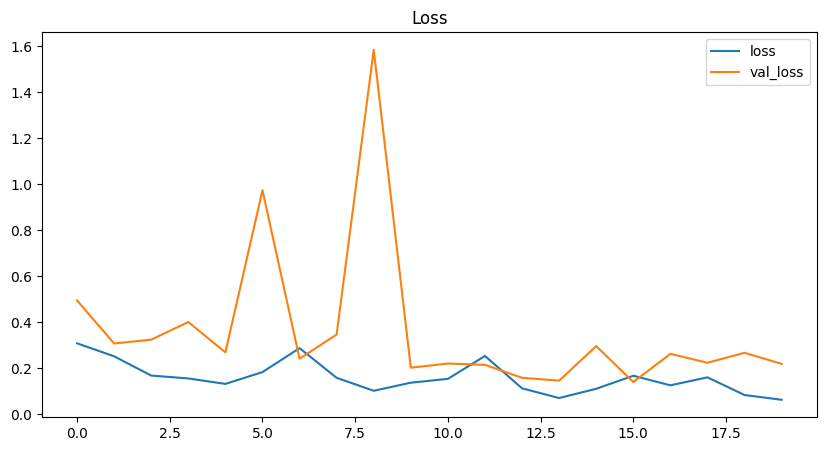

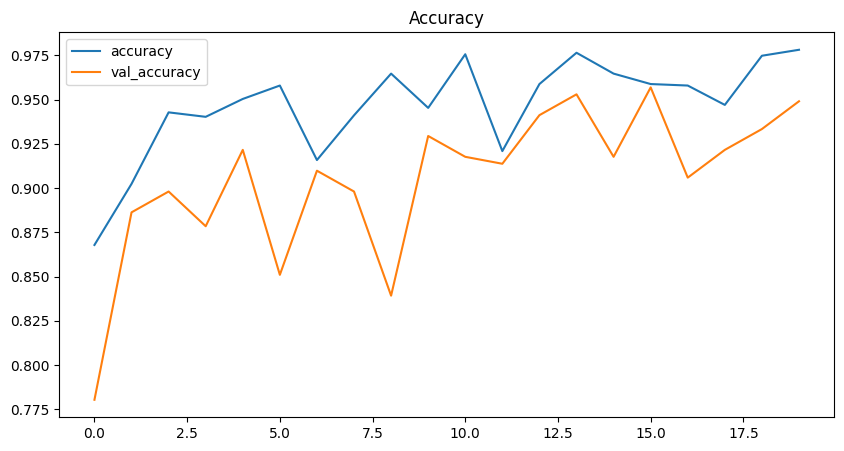

Precision: 1.0
Recall: 0.8960000276565552
Accuracy: 0.9490196108818054


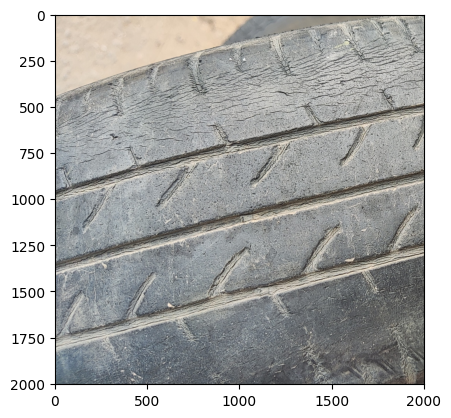

Predicted class is defective tyre


In [10]:
import os
import cv2
import imghdr
import numpy as np
import matplotlib.pyplot as plt
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, Dataset, Subset
from torchvision import transforms, models
from sklearn.model_selection import train_test_split
import torchmetrics

# GPU setup
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Data preprocessing
#data_dir = r"C:\Users\dubey\OneDrive\Desktop\Dait (Summer Intership )\Tyre dataset"
data_dir = r"C:\Users\dubey\OneDrive\Desktop\Final Sem Project\Data set\Tyre dataset"

image_exts = ['jpeg', 'jpg', 'bmp', 'png']

# Validate and clean data
for image_class in os.listdir(data_dir):
    for image in os.listdir(os.path.join(data_dir, image_class)):
        image_path = os.path.join(data_dir, image_class, image)
        try:
            img = cv2.imread(image_path)
            tip = imghdr.what(image_path)
            if tip not in image_exts:
                print('Image not in ext list {}'.format(image_path))
                os.remove(image_path)
        except Exception as e:
            print('Issue with image {}'.format(image_path))
            # os.remove(image_path)

# Custom Dataset
class TyreDataset(Dataset):
    def __init__(self, data_dir, transform=None):
        self.data_dir = data_dir
        self.transform = transform
        self.classes = os.listdir(data_dir)
        self.image_paths = []
        self.labels = []

        for idx, image_class in enumerate(self.classes):
            image_class_path = os.path.join(data_dir, image_class)
            for image in os.listdir(image_class_path):
                image_path = os.path.join(image_class_path, image)
                self.image_paths.append(image_path)
                self.labels.append(idx)

    def __len__(self):
        return len(self.image_paths)

    def __getitem__(self, idx):
        image_path = self.image_paths[idx]
        image = cv2.imread(image_path)
        image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
        label = self.labels[idx]
        
        if self.transform:
            image = self.transform(image)
        
        return image, label

transform = transforms.Compose([
    transforms.ToPILImage(),
    transforms.Resize((256, 256)),
    transforms.ToTensor(),
    transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
])

# Create dataset
dataset = TyreDataset(data_dir, transform=transform)

# Split dataset
train_idx, test_idx = train_test_split(list(range(len(dataset))), test_size=0.3, stratify=dataset.labels)
val_idx, test_idx = train_test_split(test_idx, test_size=0.5, stratify=[dataset.labels[i] for i in test_idx])

train_data = Subset(dataset, train_idx)
val_data = Subset(dataset, val_idx)
test_data = Subset(dataset, test_idx)

train_loader = DataLoader(train_data, batch_size=32, shuffle=True)
val_loader = DataLoader(val_data, batch_size=32, shuffle=True)
test_loader = DataLoader(test_data, batch_size=32, shuffle=True)

# Model definition
class TyreClassifier(nn.Module):
    def __init__(self):
        super(TyreClassifier, self).__init__()
        self.model = models.resnet18(pretrained=True)
        self.model.fc = nn.Sequential(
            nn.Linear(self.model.fc.in_features, 256),
            nn.ReLU(),
            nn.Dropout(0.4),
            nn.Linear(256, 1),
            nn.Sigmoid()
        )

    def forward(self, x):
        return self.model(x)

model = TyreClassifier().to(device)
criterion = nn.BCELoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Training function
def train_model(model, train_loader, val_loader, criterion, optimizer, epochs=20):
    history = {'loss': [], 'val_loss': [], 'accuracy': [], 'val_accuracy': []}

    for epoch in range(epochs):
        model.train()
        train_loss = 0
        correct = 0
        total = 0

        for images, labels in train_loader:
            images, labels = images.to(device), labels.to(device).float()

            optimizer.zero_grad()
            outputs = model(images).squeeze()

            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()

            train_loss += loss.item()
            preds = outputs.round()
            correct += (preds == labels).sum().item()
            total += labels.size(0)

        val_loss = 0
        val_correct = 0
        val_total = 0
        model.eval()
        
        with torch.no_grad():
            for images, labels in val_loader:
                images, labels = images.to(device), labels.to(device).float()

                outputs = model(images).squeeze()
                loss = criterion(outputs, labels)

                val_loss += loss.item()
                preds = outputs.round()
                val_correct += (preds == labels).sum().item()
                val_total += labels.size(0)

        history['loss'].append(train_loss/len(train_loader))
        history['val_loss'].append(val_loss/len(val_loader))
        history['accuracy'].append(correct/total)
        history['val_accuracy'].append(val_correct/val_total)

        print(f'Epoch {epoch+1}/{epochs}, Loss: {train_loss/len(train_loader)}, Val Loss: {val_loss/len(val_loader)}, Accuracy: {correct/total}, Val Accuracy: {val_correct/val_total}')

    return history

# Train the model
history = train_model(model, train_loader, val_loader, criterion, optimizer)

# Plotting the results
plt.figure(figsize=(10,5))
plt.title("Loss")
plt.plot(history['loss'], label='loss')
plt.plot(history['val_loss'], label='val_loss')
plt.legend()
plt.show()

plt.figure(figsize=(10,5))
plt.title("Accuracy")
plt.plot(history['accuracy'], label='accuracy')
plt.plot(history['val_accuracy'], label='val_accuracy')
plt.legend()
plt.show()

# Evaluation
model.eval()
#precision = torchmetrics.Precision().to(device)
#recall = torchmetrics.Recall().to(device)
#accuracy = torchmetrics.Accuracy().to(device)
precision = torchmetrics.classification.Precision(task="binary").to(device)
recall = torchmetrics.classification.Recall(task="binary").to(device)
accuracy = torchmetrics.classification.Accuracy(task="binary").to(device)

with torch.no_grad():
    for images, labels in test_loader:
        images, labels = images.to(device), labels.to(device).float()
        outputs = model(images).squeeze()

        preds = outputs.round()
        #precision = torchmetrics.Precision(task="binary").to(device)
        #recall = torchmetrics.Recall(task="binary").to(device)
        #accuracy = torchmetrics.Accuracy(task="binary").to(device)

        precision.update(preds, labels)
        recall.update(preds, labels)
        accuracy.update(preds, labels)

print(f'Precision: {precision.compute()}')
print(f'Recall: {recall.compute()}')
print(f'Accuracy: {accuracy.compute()}')

# Prediction example
def predict_image(image_path):
    img = cv2.imread(image_path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    plt.imshow(img)
    plt.show()

    transform = transforms.Compose([
        transforms.ToPILImage(),
        transforms.Resize((256, 256)),
        transforms.ToTensor(),
        transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
    ])
    img = transform(img).unsqueeze(0).to(device)

    model.eval()
    with torch.no_grad():
        yhat = model(img).squeeze().item()

    if yhat > 0.5:
        print(f'Predicted class is good tyre')
    else:
        print(f'Predicted class is defective tyre')
#test_image_path = r"C:\Users\dubey\OneDrive\Desktop\Final Sem Project\Data set\trainging image for tyre\Defective (1).jpg"

#predict_image(r"C:\Users\dubey\OneDrive\Desktop\Dait (Summer Intership )\Good\good (1).jpg")
predict_image(r"C:\Users\dubey\OneDrive\Desktop\Final Sem Project\Data set\trainging image for tyre\Defective (1).jpg")

In [8]:
import torchmetrics
print(torchmetrics.__version__)  # Check if it is installed correctly

1.6.1


In [ ]:
from ultralytics import YOLO
import torch
import cv2
import os
import numpy as np
import matplotlib.pyplot as plt

# Load YOLOv8 model (Replace with custom-trained model if available)
model = YOLO("yolov8n.pt")

# Set device (GPU if available)
device = "cuda" if torch.cuda.is_available() else "cpu"
model.to(device)

# Directory containing tire images
data_dir = r"C:\Users\dubey\OneDrive\Desktop\Final Sem Project\Data set\Tyre dataset"

# Supported image extensions
image_exts = ['jpeg', 'jpg', 'bmp', 'png']

# Process dataset and remove corrupted images
for image_class in os.listdir(data_dir):
    class_path = os.path.join(data_dir, image_class)
    for image in os.listdir(class_path):
        image_path = os.path.join(class_path, image)
        try:
            img = cv2.imread(image_path)
            if img is None:  # Check if image is readable
                print(f"Corrupted image found: {image_path}")
                os.remove(image_path)
        except Exception as e:
            print(f"Issue with image {image_path}: {e}")

# Function to classify a single tire image
def classify_tire(image_path):
    img = cv2.imread(image_path)

    if img is None:
        print(f"Error: Unable to read {image_path}")
        return

    # Resize image (YOLO accepts various sizes, but 640x640 is optimal)
    img_resized = cv2.resize(img, (640, 640))

    # Run YOLO model
    results = model(img_resized)

    # Get the detected object count
    detected_objects = len(results[0].boxes)

    # Draw bounding boxes on detected objects
    for r in results:
        for box in r.boxes:
            x1, y1, x2, y2 = map(int, box.xyxy[0])
            cv2.rectangle(img_resized, (x1, y1), (x2, y2), (0, 255, 0), 2)

    # Show the image with detections
    cv2.imshow("Tire Classification", img_resized)
    cv2.waitKey(0)
    cv2.destroyAllWindows()

    print(f"Detected {detected_objects} objects in {image_path}")

# Test the model on a sample image
test_image_path = r"C:\Users\dubey\OneDrive\Desktop\Final Sem Project\Data set\trainging image for tyre\Defective (1).jpg"
classify_tire(test_image_path)



0: 640x640 (no detections), 67.5ms
Speed: 13.0ms preprocess, 67.5ms inference, 158.1ms postprocess per image at shape (1, 3, 640, 640)


In [2]:
from ultralytics import YOLO
import torch
import cv2
import os
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, confusion_matrix

# Load YOLOv8 model (Replace with custom-trained model if available)
model = YOLO("yolov8n.pt")  # Replace with custom-trained model if available

# Set device (GPU if available)
device = "cuda" if torch.cuda.is_available() else "cpu"
model.to(device)

# Paths
test_dir = r"C:\Users\dubey\OneDrive\Desktop\Final Sem Project\Data set\testing image for tyre datasets"
data_dir = r"C:\Users\dubey\OneDrive\Desktop\Final Sem Project\Data set\Tyre dataset"

# Supported image extensions
image_exts = ['jpeg', 'jpg', 'bmp', 'png']

# Class Labels (Assuming 2 classes: Good Tyre & Defective Tyre)
class_labels = ["Defective Tyre", "Good Tyre"]

# Function to classify an image and return predicted class
def classify_tire(image_path):
    img = cv2.imread(image_path)
    
    if img is None:
        print(f"Error: Unable to read {image_path}")
        return None, None

    # Resize image (YOLO accepts various sizes, but 640x640 is optimal)
    img_resized = cv2.resize(img, (640, 640))

    # Run YOLO model
    results = model(img_resized)

    # Get detected object count
    detected_objects = len(results[0].boxes)

    # Extracting the class with highest confidence score
    predicted_class = None
    if detected_objects > 0:
        highest_confidence_box = max(results[0].boxes, key=lambda b: b.conf[0])  # Find highest confidence detection
        predicted_class = int(highest_confidence_box.cls[0].item())  # Get class ID

    # Draw bounding boxes and labels
    for r in results:
        for box in r.boxes:
            x1, y1, x2, y2 = map(int, box.xyxy[0])  
            label = class_labels[int(box.cls[0].item())]
            conf = box.conf[0].item()  # Confidence score

            # Draw rectangle
            cv2.rectangle(img_resized, (x1, y1), (x2, y2), (0, 255, 0), 2)
            cv2.putText(img_resized, f"{label} ({conf:.2f})", (x1, y1 - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.6, (0, 255, 255), 2)

    # Show the image with detections
    cv2.imshow("Tire Classification", img_resized)
    cv2.waitKey(0)
    cv2.destroyAllWindows()

    return predicted_class, detected_objects

# Evaluate model on the test dataset
y_true = []  # True labels
y_pred = []  # Predicted labels

for category in os.listdir(test_dir):
    category_path = os.path.join(test_dir, category)
    true_label = 0 if "Defective" in category else 1  # Assign label (0: Defective, 1: Good)

    for image_name in os.listdir(category_path):
        image_path = os.path.join(category_path, image_name)
        pred_label, _ = classify_tire(image_path)

        if pred_label is not None:
            y_true.append(true_label)
            y_pred.append(pred_label)

# Compute classification metrics
print("Classification Report:")
print(classification_report(y_true, y_pred, target_names=class_labels))

# Confusion matrix
cm = confusion_matrix(y_true, y_pred)
print("Confusion Matrix:")
print(cm)

# Plot Confusion Matrix
plt.figure(figsize=(6, 6))
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.colorbar()
tick_marks = np.arange(len(class_labels))
plt.xticks(tick_marks, class_labels, rotation=45)
plt.yticks(tick_marks, class_labels)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")

# Display values on matrix
for i in range(len(class_labels)):
    for j in range(len(class_labels)):
        plt.text(j, i, cm[i, j], horizontalalignment="center", color="white" if cm[i, j] > cm.max() / 2 else "black")

plt.show()

NotADirectoryError: [WinError 267] The directory name is invalid: 'C:\\Users\\dubey\\OneDrive\\Desktop\\Final Sem Project\\Data set\\testing image for tyre datasets\\Defective (1).jpg'

In [5]:
import os
from ultralytics import YOLO
import torch
import cv2
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, confusion_matrix

# Load YOLOv8 model (Replace with custom-trained model if available)
model = YOLO("yolov8n.pt")

# Set device (GPU if available)
device = "cuda" if torch.cuda.is_available() else "cpu"
model.to(device)

# Paths
test_dir = r"C:\Users\dubey\OneDrive\Desktop\Final Sem Project\Data set\trainging image for tyre"
data_dir = r"C:\Users\dubey\OneDrive\Desktop\Final Sem Project\Data set\Tyre dataset"

# Class Labels (Assuming 2 classes: Good Tyre & Defective Tyre)
class_labels = ["Defective Tyre", "Good Tyre"]

# Function to classify a single image
def classify_tire(image_path):
    img = cv2.imread(image_path)
    
    if img is None:
        print(f"Error: Unable to read {image_path}")
        return None, None

    # Resize image (YOLO accepts various sizes, but 640x640 is optimal)
    img_resized = cv2.resize(img, (640, 640))

    # Run YOLO model
    results = model(img_resized)

    # Get detected object count
    detected_objects = len(results[0].boxes)

    # Extract the class with highest confidence
    predicted_class = None
    if detected_objects > 0:
        highest_confidence_box = max(results[0].boxes, key=lambda b: b.conf[0])  # Find highest confidence detection
        predicted_class = int(highest_confidence_box.cls[0].item())  # Get class ID

    return predicted_class, detected_objects

# Evaluate model on the test dataset
y_true = []  # True labels
y_pred = []  # Predicted labels

for category in os.listdir(test_dir):
    category_path = os.path.join(test_dir, category)

    # ✅ Fix: Check if the category_path is a directory
    if not os.path.isdir(category_path):
        continue  # Skip if it's not a folder

    true_label = 0 if "Defective" in category else 1  # Assign label (0: Defective, 1: Good)

    for image_name in os.listdir(category_path):
        image_path = os.path.join(category_path, image_name)

        # ✅ Fix: Check if it's an image file
        if not os.path.isfile(image_path):
            continue  # Skip non-image files

        pred_label, _ = classify_tire(image_path)

        if pred_label is not None:
            y_true.append(true_label)
            y_pred.append(pred_label)

# Compute classification metrics
print("Classification Report:")
print(classification_report(y_true, y_pred, target_names=class_labels))

# Confusion matrix
cm = confusion_matrix(y_true, y_pred)
print("Confusion Matrix:")
print(cm)

# Plot Confusion Matrix
plt.figure(figsize=(6, 6))
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.colorbar()
tick_marks = np.arange(len(class_labels))
plt.xticks(tick_marks, class_labels, rotation=45)
plt.yticks(tick_marks, class_labels)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")

# Display values on matrix
for i in range(len(class_labels)):
    for j in range(len(class_labels)):
        plt.text(j, i, cm[i, j], horizontalalignment="center", 
                 color="white" if cm[i, j] > cm.max() / 2 else "black")

plt.show()


0: 640x640 (no detections), 68.4ms
Speed: 25.8ms preprocess, 68.4ms inference, 173.5ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 68.5ms
Speed: 11.5ms preprocess, 68.5ms inference, 3.2ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 68.1ms
Speed: 12.4ms preprocess, 68.1ms inference, 3.8ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 68.3ms
Speed: 13.1ms preprocess, 68.3ms inference, 7.4ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 68.2ms
Speed: 13.8ms preprocess, 68.2ms inference, 6.2ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 68.1ms
Speed: 12.7ms preprocess, 68.1ms inference, 4.1ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 surfboard, 68.1ms
Speed: 13.0ms preprocess, 68.1ms inference, 686.8ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 68.5ms
Speed: 12.6ms preprocess, 

ValueError: Number of classes, 22, does not match size of target_names, 2. Try specifying the labels parameter


0: 640x640 (no detections), 43.8ms
Speed: 29.0ms preprocess, 43.8ms inference, 289.6ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 29.4ms
Speed: 9.9ms preprocess, 29.4ms inference, 2.3ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 31.4ms
Speed: 7.8ms preprocess, 31.4ms inference, 3.4ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 33.1ms
Speed: 8.7ms preprocess, 33.1ms inference, 3.3ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 34.7ms
Speed: 10.1ms preprocess, 34.7ms inference, 2.9ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 35.9ms
Speed: 9.9ms preprocess, 35.9ms inference, 4.0ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 surfboard, 41.2ms
Speed: 15.8ms preprocess, 41.2ms inference, 497.2ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 34.5ms
Speed: 8.9ms preprocess, 34.5m

C:\Users\dubey\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\dubey\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\dubey\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifie

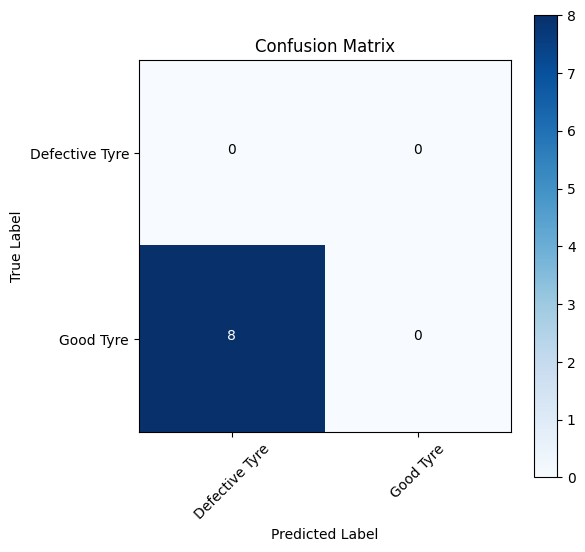

In [1]:
import os
from ultralytics import YOLO
import torch
import cv2
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, confusion_matrix

# Load YOLOv8 model
model = YOLO("yolov8n.pt")

# Set device (GPU if available)
device = "cuda" if torch.cuda.is_available() else "cpu"
model.to(device)

# Paths
test_dir = r"C:\Users\dubey\OneDrive\Desktop\Final Sem Project\Data set\trainging image for tyre"

# Class Labels (0: Defective Tyre, 1: Good Tyre)
class_labels = ["Defective Tyre", "Good Tyre"]

def classify_tire(image_path):
    """Classify an image using YOLOv8."""
    img = cv2.imread(image_path)
    if img is None:
        print(f"Error: Unable to read {image_path}")
        return None, None

    img_resized = cv2.resize(img, (640, 640))
    results = model(img_resized)
    
    detected_objects = len(results[0].boxes)
    predicted_class = None
    
    if detected_objects > 0:
        highest_confidence_box = max(results[0].boxes, key=lambda b: b.conf[0])
        pred_cls = int(highest_confidence_box.cls[0].item())
        
        # Ensure we only use known classes
        if pred_cls in [0, 1]:
            predicted_class = pred_cls
    
    return predicted_class, detected_objects

# Evaluate model
y_true = []
y_pred = []

for category in os.listdir(test_dir):
    category_path = os.path.join(test_dir, category)
    if not os.path.isdir(category_path):
        continue
    
    true_label = 0 if "Defective" in category else 1
    
    for image_name in os.listdir(category_path):
        image_path = os.path.join(category_path, image_name)
        if not os.path.isfile(image_path):
            continue
        
        pred_label, _ = classify_tire(image_path)
        
        if pred_label is not None:
            y_true.append(true_label)
            y_pred.append(pred_label)

# Ensure correct labels for classification report
unique_labels = sorted(set(y_true) | set(y_pred))
label_names = [class_labels[i] for i in unique_labels]

# Compute metrics
print("Classification Report:")
print(classification_report(y_true, y_pred, target_names=label_names))

cm = confusion_matrix(y_true, y_pred)
plt.figure(figsize=(6, 6))
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.colorbar()
tick_marks = np.arange(len(label_names))
plt.xticks(tick_marks, label_names, rotation=45)
plt.yticks(tick_marks, label_names)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")

for i in range(len(label_names)):
    for j in range(len(label_names)):
        plt.text(j, i, cm[i, j], horizontalalignment="center", 
                 color="white" if cm[i, j] > cm.max() / 2 else "black")

plt.show()

In [1]:
import os
import shutil
from sklearn.model_selection import train_test_split

def prepare_yolo_dataset(base_dir, output_dir, test_size=0.2):
    classes = ['defective', 'good']
    image_exts = ('.jpg', '.jpeg', '.png')

    images = []
    labels = []

    for cls_id, cls in enumerate(classes):
        cls_folder = os.path.join(base_dir, cls)
        if not os.path.exists(cls_folder):
            print(f"Warning: {cls_folder} does not exist.")
            continue
        for img_file in os.listdir(cls_folder):
            if img_file.lower().endswith(image_exts):
                images.append(os.path.join(cls_folder, img_file))
                labels.append(cls_id)

    if len(images) < 2:
        raise ValueError("Not enough images to split into train/val. Need at least 2.")

    train_imgs, val_imgs, train_labels, val_labels = train_test_split(
        images, labels, test_size=test_size, stratify=labels
    )

    def copy_images(img_paths, lbls, split):
        for img_path, lbl in zip(img_paths, lbls):
            file = os.path.basename(img_path)
            name, ext = os.path.splitext(file)

            img_dir = os.path.join(output_dir, 'images', split)
            lbl_dir = os.path.join(output_dir, 'labels', split)
            os.makedirs(img_dir, exist_ok=True)
            os.makedirs(lbl_dir, exist_ok=True)

            shutil.copy(img_path, os.path.join(img_dir, file))

            with open(os.path.join(lbl_dir, name + ".txt"), 'w') as f:
                f.write(f"{lbl} 0.5 0.5 1.0 1.0\n")  # full image bounding box

        print(f"{split.upper()} split: {len(img_paths)} images")

    copy_images(train_imgs, train_labels, "train")
    copy_images(val_imgs, val_labels, "val")


# Use the correct input/output
prepare_yolo_dataset(
    base_dir=r"C:\Users\dubey\OneDrive\Desktop\Final Sem Project\Data set\Tyre dataset",
    output_dir=r"C:\Users\dubey\OneDrive\Desktop\Final Sem Project\yolo_ready_dataset"
)

TRAIN split: 1358 images
VAL split: 340 images


In [2]:
# STEP 3: Create tyre.yaml
yaml_content = r"""
path: C:\Users\dubey\OneDrive\Desktop\Final Sem Project\yolo_ready_dataset
train: images/train
val: images/val
nc: 2
names: ['defective', 'good']
"""

with open("tyre.yaml", "w") as f:
    f.write(yaml_content.strip())

In [ ]:
# STEP 4: Train YOLOv8
from ultralytics import YOLO

model = YOLO("yolov8n.pt")  # You can also try yolov8s.pt

model.train(
    data="tyre.yaml",
    epochs=50,
    imgsz=640,
    batch=16,
    name="tyre_detector"
)

New https://pypi.org/project/ultralytics/8.3.107 available  Update with 'pip install -U ultralytics'
Ultralytics 8.3.78  Python-3.10.5 torch-2.6.0+cu118 CUDA:0 (NVIDIA GeForce RTX 3050 Laptop GPU, 4096MiB)
engine\trainer: task=detect, mode=train, model=yolov8n.pt, data=tyre.yaml, epochs=50, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=tyre_detector14, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=Fal

train: Scanning C:\Users\dubey\OneDrive\Desktop\Final Sem Project\yolo_ready_dataset\labels\train... 1358 images, 0 bac


train: New cache created: C:\Users\dubey\OneDrive\Desktop\Final Sem Project\yolo_ready_dataset\labels\train.cache


val: Scanning C:\Users\dubey\OneDrive\Desktop\Final Sem Project\yolo_ready_dataset\labels\val... 340 images, 0 backgrou


val: New cache created: C:\Users\dubey\OneDrive\Desktop\Final Sem Project\yolo_ready_dataset\labels\val.cache


In [ ]:
# STEP 5: Inference
import cv2
import matplotlib.pyplot as plt

def predict_image(image_path):
    model = YOLO("runs/detect/tyre_detector/weights/best.pt")
    results = model(image_path)

    results.print()
    results.show()

    img = cv2.imread(image_path)
    img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    plt.imshow(img_rgb)
    plt.axis('off')
    plt.title("Predictions")
    plt.show()

    for r in results:
        for box in r.boxes:
            cls = int(box.cls)
            conf = float(box.conf)
            label = r.names[cls]
            print(f"Detected: {label}, Confidence: {conf:.2f}")

# Example usage:
predict_image(r"C:/Users/dubey/OneDrive/Desktop/Final Sem Project/Data set/yolo_ready_dataset/images/val/defective_1.jpg")

In [ ]:
# STEP 6: EVALUATE ACCURACY, PRECISION, RECALL
from sklearn.metrics import accuracy_score, precision_score, recall_score
import numpy as np

def evaluate_model(model_path, image_dir, label_dir):
    model = YOLO(model_path)
    
    all_preds = []
    all_labels = []

    image_files = os.listdir(image_dir)
    for img_file in image_files:
        if not img_file.lower().endswith(('.jpg', '.jpeg', '.png')):
            continue

        img_path = os.path.join(image_dir, img_file)
        label_path = os.path.join(label_dir, os.path.splitext(img_file)[0] + ".txt")

        # Get ground truth
        if not os.path.exists(label_path):
            continue

        with open(label_path, 'r') as f:
            lines = f.readlines()
            gt_classes = [int(line.strip().split()[0]) for line in lines]
        
        # Skip multi-labels
        if len(gt_classes) != 1:
            continue
        gt_class = gt_classes[0]
        
        # Predict
        results = model(img_path, conf=0.25, iou=0.5)
        pred_classes = []
        for r in results:
            pred_classes += [int(cls.item()) for cls in r.boxes.cls]

        # Assume 1 object per image (as per label), take most confident pred or fallback to 0
        pred_class = pred_classes[0] if len(pred_classes) else 0

        all_preds.append(pred_class)
        all_labels.append(gt_class)

    acc = accuracy_score(all_labels, all_preds)
    prec = precision_score(all_labels, all_preds, zero_division=0)
    rec = recall_score(all_labels, all_preds, zero_division=0)

    print(f"Accuracy:  {acc:.4f}")
    print(f"Precision: {prec:.4f}")
    print(f"Recall:    {rec:.4f}")

# Example usage:
evaluate_model(
    model_path="runs/detect/tyre_detector/weights/best.pt",
    image_dir=r"C:/Users/dubey/OneDrive/Desktop/Final Sem Project/Data set/yolo_ready_dataset/images/val",
    label_dir=r"C:/Users/dubey/OneDrive/Desktop/Final Sem Project/Data set/yolo_ready_dataset/labels/val"
)